In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import f_oneway

In [3]:
df = pd.read_csv("/Users/zeldudu/Documents/Zalo Received Files/CanTho_data_model copy 2.csv")

In [4]:
df.head(5)

,Index,District,Commune,Village,Area (ha),Season,Variety,Yield,Nfert,P2O5fert,...,CF,N2OfertE,STburE,GHGE,ProdCost,GrossInc,NetInc,Train_1M5R,Train_SRP,Train_No
0,245.0,Vĩnh Thạnh,Thạnh_Lợi,C2,2.59,WS2223,dai_thom,8.3,114,86,...,0.82,237.0,567,"3,534.14","23,519,645","27,980,756","52,297,297",0.0,1.0,0.0
1,246.0,Vĩnh Thạnh,Thạnh_Lợi,C2,1.30,WS2223,dai_thom,8.1,124,78,...,1.23,258.0,551,"6,177.53","22,554,585","27,576,177","50,884,615",0.0,1.0,0.0
2,247.0,Vĩnh Thạnh,Thạnh_Lợi,C2,2.59,WS2223,dai_thom,6.9,80,55,...,0.84,167.0,332,"2,960.68","22,335,246","20,846,204","43,783,784",1.0,0.0,0.0
3,248.0,Vĩnh Thạnh,Thạnh_Lợi,C2,1.94,WS2223,dai_thom,7.2,80,87,...,0.83,166.0,1,"2,967.99","29,845,534","17,157,945","47,628,866",1.0,1.0,0.0
4,249.0,Vĩnh Thạnh,Thạnh_Lợi,C2,1.23,WS2223,dai_thom,7.8,92,72,...,1.36,192.0,1,"6,628.95","18,935,439","29,598,859","49,210,732",0.0,0.0,1.0


In [26]:
#df.rename(columns=lambda x: x.strip(), inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3003 entries, 0 to 3002
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           3000 non-null   float64
 1   District        3000 non-null   object 
 2   Commune         3000 non-null   object 
 3   Village         3000 non-null   object 
 4   Area (ha)       3000 non-null   float64
 5   Season          3000 non-null   object 
 6   Variety         2915 non-null   object 
 7   Yield           3000 non-null   object 
 8   Nfert           2993 non-null   object 
 9   P2O5fert        2993 non-null   object 
 10  K2Ofert         2993 non-null   object 
 11  ORGfert         3000 non-null   object 
 12  RSGroup         3000 non-null   object 
 13  PSTrem          3000 non-null   object 
 14  PSTinc          3000 non-null   object 
 15  PSTbur          3000 non-null   object 
 16  TotGHGE         3000 non-null   object 
 17  InstensityGHGE  3000 non-null   o

In [28]:
columns = ["TotGHGE", "ProdCost", "GrossInc", "NetInc", "GHGE", "Yield"]
for column in columns:
    df[column] = df[column].str.replace(",", "", regex=True)
for column in columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3003 entries, 0 to 3002
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           3000 non-null   float64
 1   District        3000 non-null   object 
 2   Commune         3000 non-null   object 
 3   Village         3000 non-null   object 
 4   Area (ha)       3000 non-null   float64
 5   Season          3000 non-null   object 
 6   Variety         2915 non-null   object 
 7   Yield           2912 non-null   float64
 8   Nfert           2993 non-null   object 
 9   P2O5fert        2993 non-null   object 
 10  K2Ofert         2993 non-null   object 
 11  ORGfert         3000 non-null   object 
 12  RSGroup         3000 non-null   object 
 13  PSTrem          3000 non-null   object 
 14  PSTinc          3000 non-null   object 
 15  PSTbur          3000 non-null   object 
 16  TotGHGE         2905 non-null   float64
 17  InstensityGHGE  3000 non-null   o

In [30]:
#df = df.replace('no_fert_info', pd.NA)
df = df.replace('no_rice', pd.NA)
df = df.dropna()

#df = df.drop(columns=["CF", "N2OfertE", "Water", "CH4soilE", "Variety"])

In [31]:
columns_to_convert = ['Yield', 'ORGfert']
#'Nfert', 'ORGfert','PSTrem', 'PSTinc', 'PSTbur', 'TotGHGE', 'InstensityGHGE', 'SeedRate', 'STburE', 'prePSTrem', 'prePSTbur', 'prePSTinc']

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [32]:
df['SumNetInc'] = df.groupby('Index')['NetInc'].transform('sum')

#df = df.drop(columns=['TotalNetInc'])

print(df)

       Index    District    Commune Village  Area (ha)  Season   Variety  \
0      245.0  Vĩnh Thạnh  Thạnh_Lợi      C2       2.59  WS2223  dai_thom   
1      246.0  Vĩnh Thạnh  Thạnh_Lợi      C2       1.30  WS2223  dai_thom   
2      247.0  Vĩnh Thạnh  Thạnh_Lợi      C2       2.59  WS2223  dai_thom   
3      248.0  Vĩnh Thạnh  Thạnh_Lợi      C2       1.94  WS2223  dai_thom   
4      249.0  Vĩnh Thạnh  Thạnh_Lợi      C2       1.23  WS2223  dai_thom   
...      ...         ...        ...     ...        ...     ...       ...   
2995  3669.0  Vĩnh Thạnh  Thạnh_Lợi      C2       1.56    AW23    om5451   
2996  3670.0  Vĩnh Thạnh  Thạnh_Lợi      D2       1.30    AW23    om5451   
2997  3671.0  Vĩnh Thạnh  Thạnh_Lợi      D2       1.81    AW23    om5451   
2998  3672.0  Vĩnh Thạnh  Thạnh_Lợi      D2       1.81    AW23    om5451   
2999  3674.0  Vĩnh Thạnh  Thạnh_Lợi      D2       2.59    AW23    om5451   

      Yield Nfert P2O5fert  ...  N2OfertE   STburE     GHGE    ProdCost  \
0       8.3 

In [33]:
sns.set_theme(style="darkgrid")

In [34]:
df['SumNetInc'] = df['SumNetInc']/25000

In [6]:
def classify(row):
    if row['Train_No'] == 1.0:
        return 'No Training'
    elif row['Train_SRP'] == 1.0:
        return 'SPR'
    else:
        return '1M5R'
df['Train_Group'] = df.apply(classify, axis=1)

In [7]:
def classify2(row):
    if row['Train_No'] == 1:
        return 'Non-Trained'
    if row['Train_SRP'] == 1 or row['Train_1M5R'] == 1:
        return 'Trained'
df.loc[:, 'Train_Farmers'] = df.apply(classify2, axis=1)

In [47]:
nontrain = df[df['Train_Farmers'] == 'Non-Trained']
train = df[df['Train_Farmers'] == 'Trained']

nontrain_cost = nontrain['NetInc']
train_cost = train['NetInc']

# Perform the t-test:
t_stat, p_value = stats.ttest_ind(nontrain_cost, train_cost)

# Interpret the results:
alpha = 0.05
if p_value < alpha:
    print(t_stat, p_value, "\nReject the null hypothesis; there is a significant difference between the net income of non-trained and trained farmers.")
else:
    print(t_stat, p_value, "\nFail to reject the null hypothesis; there is no significant difference between the net income of non-trained and trained farmers.")

-7.469927626919989 1.7884494292494116e-13 
Reject the null hypothesis; there is a significant difference between the net income of non-trained and trained farmers.


/var/folders/dc/hgbl5s_d7q32x_27t31qcj_c0000gn/T/ipykernel_83827/2998613862.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter_plot = sns.scatterplot(x='Area (ha)', y='SumNetInc', data=df, palette='flare', s=100, alpha=0.6, edgecolor='w', linewidth=0.5)


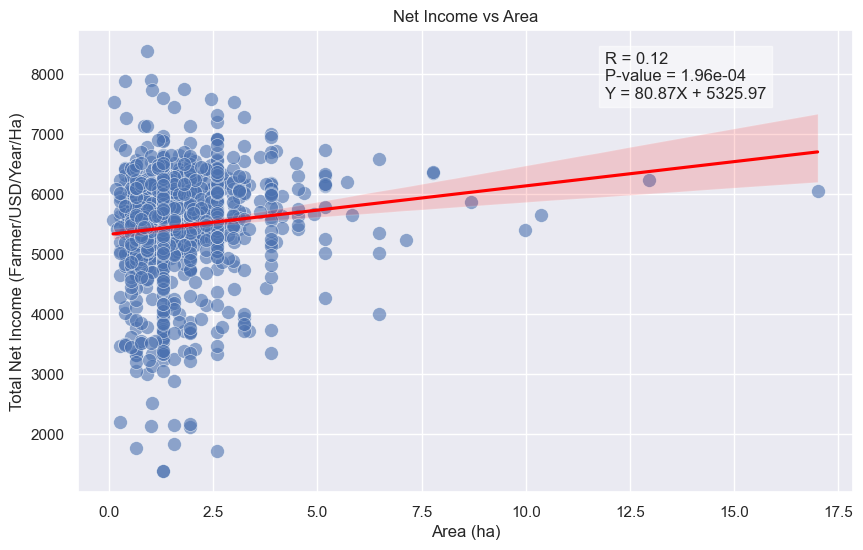

In [39]:
from sklearn.linear_model import LinearRegression

df = df.drop_duplicates(subset='Index', keep="last")

r, p_value = pearsonr(df['Area (ha)'], df['SumNetInc'])

# Scatter plot
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='Area (ha)', y='SumNetInc', data=df, palette='flare', s=100, alpha=0.6, edgecolor='w', linewidth=0.5)

# Fit a linear regression model
X = df[['Area (ha)']]
y = df['SumNetInc']
reg = LinearRegression().fit(X, y)
slope = reg.coef_[0]
intercept = reg.intercept_

# Regression line
sns.regplot(x='Area (ha)', y='SumNetInc', data=df, scatter=False, color='red', ax=scatter_plot)

# Annotate the plot with Pearson correlation, p-value, and regression line equation
plt.text(x=max(df['Area (ha)']) * 0.7, y=max(df['SumNetInc']) * 0.9, 
         s=f'R = {r:.2f}\nP-value = {p_value:.2e}\nY = {slope:.2f}X + {intercept:.2f}', 
         ha='left', va='bottom', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))


plt.title('Net Income vs Area')
plt.xlabel('Area (ha)')
plt.ylabel('Total Net Income (Farmer/USD/Year/Ha)')
plt.show()

In [14]:
df['NetInc'] = df['NetInc']/25000

/var/folders/dc/hgbl5s_d7q32x_27t31qcj_c0000gn/T/ipykernel_1353/3455086294.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter_plot = sns.scatterplot(x='Age', y='NetInc', data=final_df, palette='flare', s=100, alpha=0.6, edgecolor='w', linewidth=0.5)


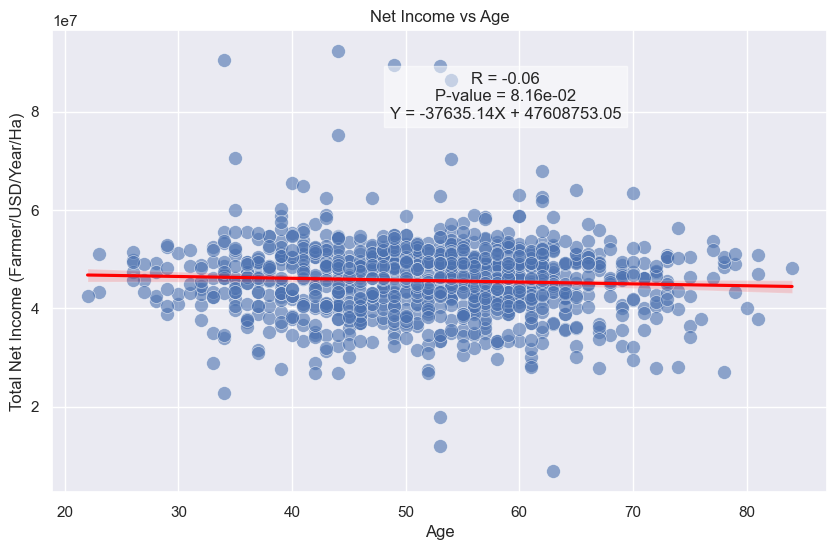

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm

# Group by 'Index' to sum 'NetInc' for each farmer
sum_netinc_df = df.groupby('Index')['NetInc'].sum().reset_index()

first_occurrence_df = df.drop_duplicates('Index').drop(columns=['NetInc'])
final_df = first_occurrence_df.merge(sum_netinc_df, on='Index')

# Calculate Pearson correlation
r, p_value = pearsonr(final_df['Age'], final_df['NetInc'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='Age', y='NetInc', data=final_df, palette='flare', s=100, alpha=0.6, edgecolor='w', linewidth=0.5)

# Fit a regression model using statsmodels
X = sm.add_constant(final_df['Age'])
model = sm.OLS(final_df['NetInc'], X).fit()
intercept, slope = model.params

# Add a regression line
sns.regplot(x='Age', y='NetInc', data=final_df, scatter=False, color='red', ax=scatter_plot)

# Annotate the plot with Pearson correlation, p-value, and regression line equation
plt.text(x=max(final_df['Age']) * 0.7, y=max(final_df['NetInc']) * 0.9, 
         s=f'R = {r:.2f}\nP-value = {p_value:.2e}\nY = {slope:.2f}X + {intercept:.2f}', 
         ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.title('Net Income vs Age')
plt.xlabel('Age')
plt.ylabel('Total Net Income (Farmer/USD/Year/Ha)')
plt.show()

/Users/zeldudu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


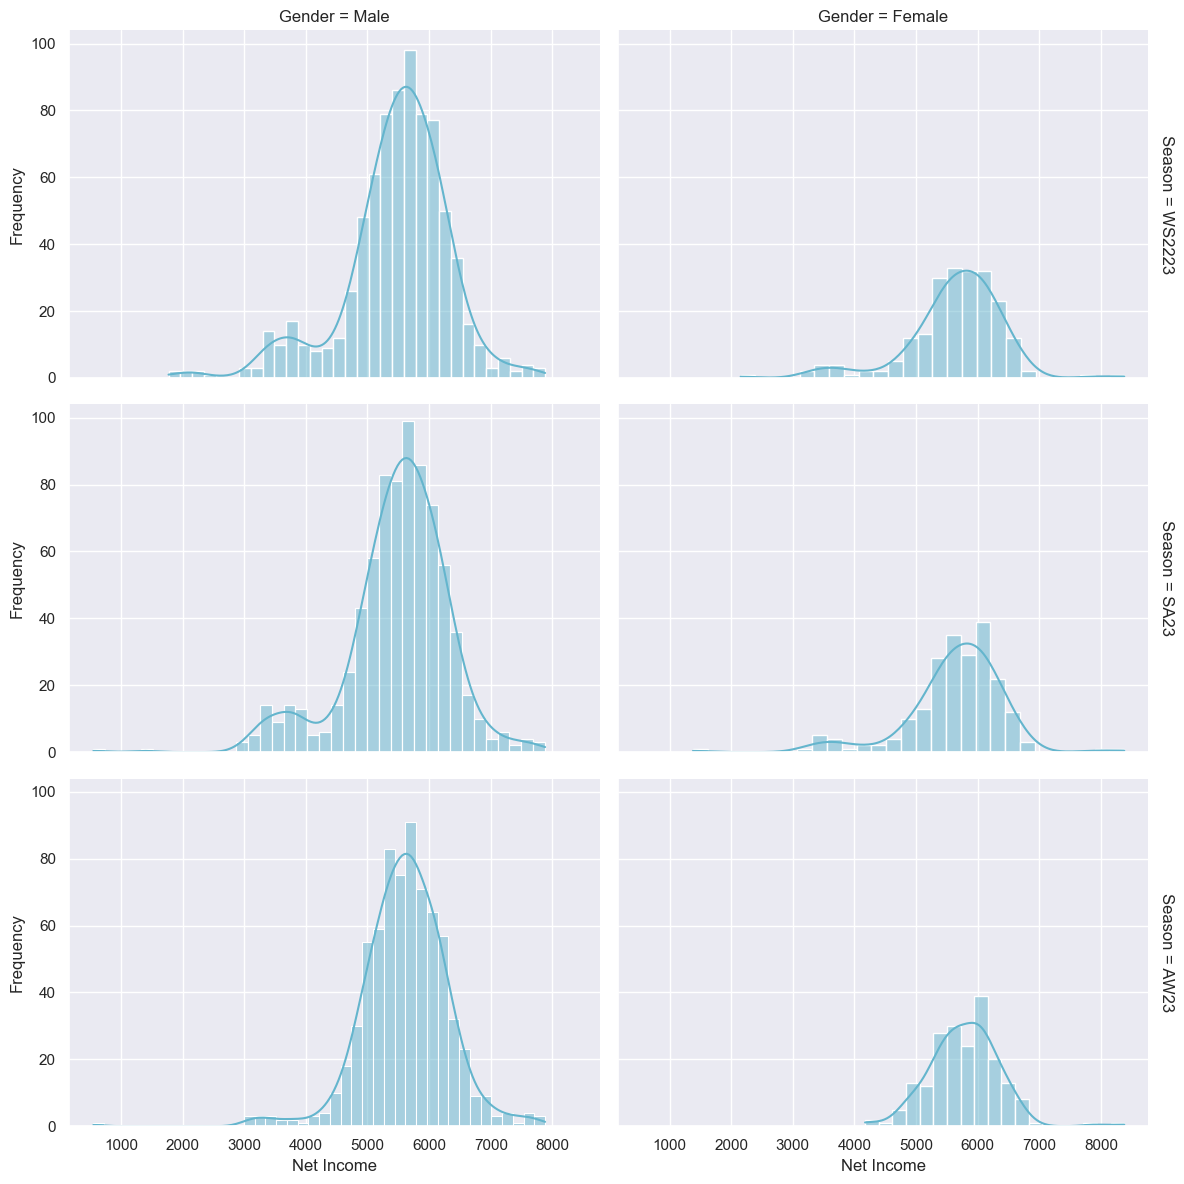

In [15]:
# Create histogram plot with column and row
g = sns.FacetGrid(df, row = 'Season', col='Gender', height=4, aspect=1.5, margin_titles=True)
g.map(sns.histplot, 'SumNetInc', kde=True, color='c')

g.set_axis_labels('Net Income', 'Frequency')
g.set_titles('{row_name} Season | {col_name}')
g.tight_layout()

plt.show()

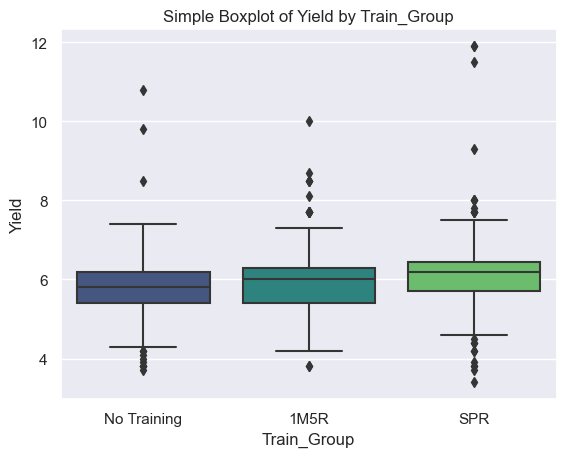

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for NaN values and drop them if necessary
df_clean = df.dropna(subset=['Yield', 'Train_Group', 'Season'])

# Simple plot to test if data is visualized correctly
sns.boxplot(data=df_clean, x='Train_Group', y='Yield', palette='viridis')
plt.title('Simple Boxplot of Yield by Train_Group')
plt.show()

In [23]:
#df[df['OrgFert_group']=='No Training'].count()

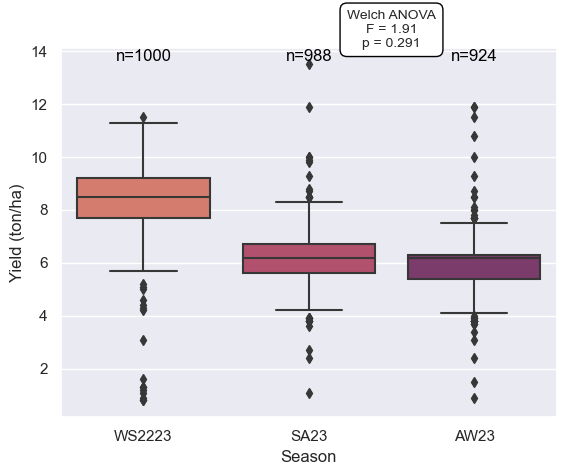

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f

df_clean = df.dropna(subset=['Yield', 'Season'])

# Create the boxplot
ax = sns.boxplot(x='Season', y='Yield', data=df_clean, palette='flare')
plt.xlabel("Season")
plt.ylabel("Yield (ton/ha)")

# Calculate the number of observations per group
category_counts = df_clean['Season'].value_counts().to_dict()

# Correct order
group_order = ['WS2223', 'SA23', 'AW23']

# Add the count annotations to the plot in the correct order
for i, group in enumerate(group_order):
    count = category_counts.get(group, 0)
    plt.text(i, df_clean['Yield'].max() + (df_clean['Yield'].max() * 0.01), f'n={count}', ha='center', color='black')

# Function to compute Welch's ANOVA
def welchs_anova(*args):
    num_groups = len(args)
    group_means = [group.mean() for group in args]
    group_vars = [group.var(ddof=1) for group in args]
    group_sizes = [len(group) for group in args]
    
    # Calculate the weighted mean
    weighted_mean = sum(mean / var for mean, var in zip(group_means, group_vars)) / sum(1 / var for var in group_vars)
    
    # Calculate the between-group sum of squares
    ss_between = sum(size * (mean - weighted_mean) ** 2 for size, mean in zip(group_sizes, group_means))
    
    # Calculate the within-group sum of squares
    ss_within = sum((size - 1) * var for size, var in zip(group_sizes, group_vars))
    
    # Calculate Welch's F statistic
    df_between = num_groups - 1
    df_within = sum((size - 1) / size for size in group_sizes)
    F_statistic = (ss_between / df_between) / (ss_within / df_within)
    
    # Calculate the p-value
    p_value = 1 - f.cdf(F_statistic, df_between, df_within)
    
    return F_statistic, p_value

# Perform Welch's ANOVA
groups = [df_clean['Yield'][df_clean['Season'] == group] for group in group_order]
F_statistic, p_value = welchs_anova(*groups)

# Add ANOVA result to the plot
plt.text(1.5, df_clean['Yield'].max() + (df_clean['Yield'].max() * 0.05), 
         f'Welch ANOVA\nF = {F_statistic:.2f}\np = {p_value:.3f}', 
         ha='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()


In [79]:
def classify(row):
    if row['ORGfert'] == 0:
        return 'No organic fertilizer'
    else:
        return '<1 ton/ha'
df['OrgF_Group'] = df.apply(classify, axis=1)

/Users/zeldudu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/zeldudu/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


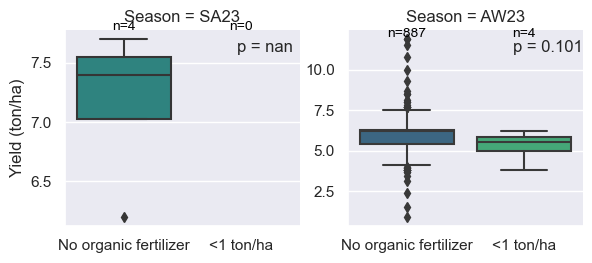

In [80]:
# Create the FacetGrid
g = sns.FacetGrid(df, col='Season', col_wrap=3, sharey=False)
g.map_dataframe(sns.boxplot, x='OrgF_Group', y='Yield', palette='viridis')

# Iterate over each subplot to annotate and add count (n=)
for ax, season in zip(g.axes.flat, df['Season'].unique()):
    sub_df = df[df['Season'] == season]
    
    # Perform ANOVA
    anova_result = f_oneway(sub_df['Yield'][sub_df['OrgF_Group'] == 'No organic fertilizer'],
                            sub_df['Yield'][sub_df['OrgF_Group'] == '<1 ton/ha'])
    
    # F-statistic and p-value
    F_statistic = anova_result.statistic
    p_value = anova_result.pvalue
    
    # Add ANOVA result to the plot
    ax.text(0.85, 0.95, f'p = {p_value:.3f}', transform=ax.transAxes, fontsize=12, va='top', ha='center')
    
    # Calculate number of observations per group
    nobs = sub_df['OrgF_Group'].value_counts().sort_index()
    nobs_text = [f'n={nobs.get(group, 0)}' for group in ['No organic fertilizer', '<1 ton/ha']]
    
    # Add count (n=) annotation for each category in the subplot
    for i, text in enumerate(nobs_text):
        ax.text(i, sub_df['Yield'].max() + (sub_df['Yield'].max() * 0.01), text, ha='center', color='black', fontsize=10)


g.set_axis_labels("", "Yield (ton/ha)")
plt.show()

/Users/zeldudu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


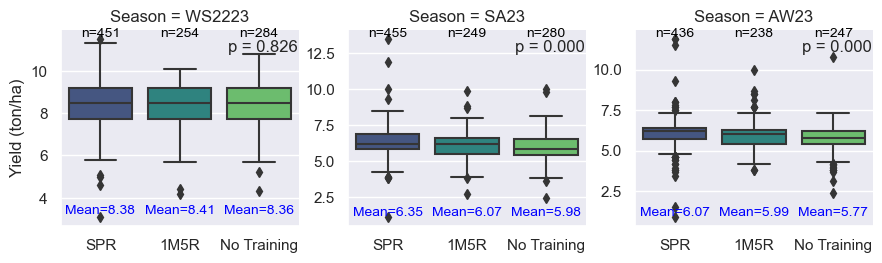

In [31]:
# Create the FacetGrid
g = sns.FacetGrid(df, col='Season', col_wrap=3, sharey=False)
g.map_dataframe(sns.boxplot, x='Train_Group', y='Yield', palette='viridis')

# Iterate over each subplot to annotate
for ax, season in zip(g.axes.flat, df['Season'].unique()):
    sub_df = df[df['Season'] == season]
    
    # Perform ANOVA
    anova_result = f_oneway(sub_df['Yield'][sub_df['Train_Group'] == 'SPR'],
                            sub_df['Yield'][sub_df['Train_Group'] == '1M5R'],
                            sub_df['Yield'][sub_df['Train_Group'] == 'No Training'])
    
    # F-statistic and p-value
    F_statistic = anova_result.statistic
    p_value = anova_result.pvalue
    
    # Add ANOVA result to the plot
    ax.text(0.85, 0.95, f'p = {p_value:.3f}', transform=ax.transAxes, fontsize=12, va='top', ha='center')
    
    # Calculate number of observations per group
    nobs = sub_df['Train_Group'].value_counts().sort_index()
    nobs_text = [f'n={nobs.get(group, 0)}' for group in ['SPR', '1M5R', 'No Training']]
    
    # Add count (n=) annotation for each category in the subplot
    for i, text in enumerate(nobs_text):
        ax.text(i, sub_df['Yield'].max() + (sub_df['Yield'].max() * 0.01), text, ha='center', color='black', fontsize=10)
    
    # Calculate mean values per group
    means = sub_df.groupby('Train_Group')['Yield'].mean().sort_index()
    mean_text = [f'Mean={means.get(group, 0):.2f}' for group in ['SPR', '1M5R', 'No Training']]
    
    # Add mean values to the plot
    for i, text in enumerate(mean_text):
        ax.text(i, sub_df['Yield'].min() + (sub_df['Yield'].min() * 0.05), text, ha='center', color='blue', fontsize=10)

# Set axis labels for FacetGrid
g.set_axis_labels("", "Yield (ton/ha)")

plt.show()

In [33]:
#df[df['OrgF_Group']=='<1 ton/ha'].count()

/Users/zeldudu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


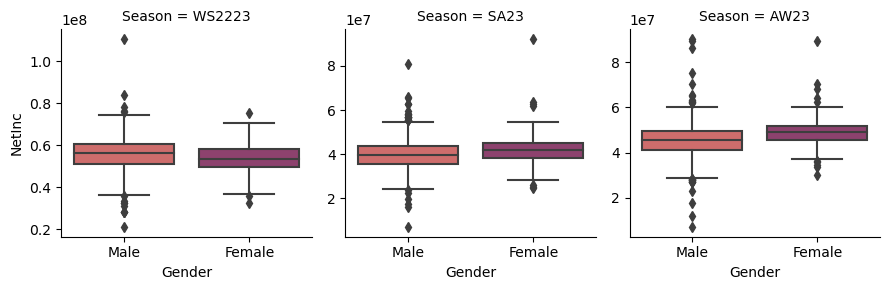

In [16]:
g = sns.FacetGrid(df, col='Season', col_wrap=3, sharey=False)
g.map_dataframe(sns.boxplot, x='Gender', y='NetInc', palette='flare')

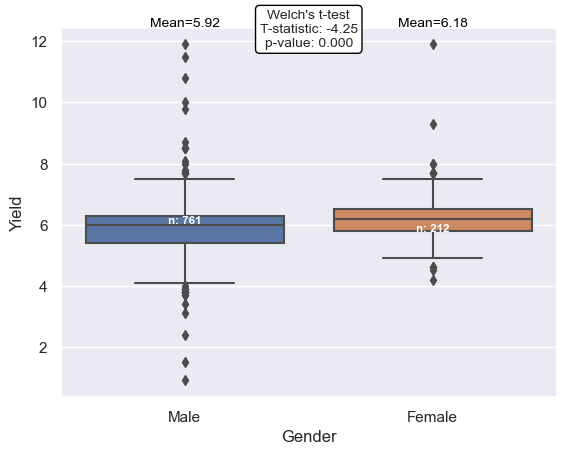

In [72]:
from scipy.stats import ttest_ind

# Drop duplicates based on 'Index'
df = df.drop_duplicates(subset='Index', keep="last")

# Create boxplot
ax = sns.boxplot(x='Gender', y='Yield', data=df)

# Calculate number of observations per group & mean to position labels
medians = df.groupby(['Gender'])['Yield'].mean().values
nobs = df['Gender'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

# Position the text in the middle
pos = range(len(nobs))
for tick, label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick] - 0.14,
            nobs[tick],
            ha='center',
            size='x-small',
            color='w',
            weight='semibold')

# Welch's t-test
male_yield = df['Yield'][df['Gender'] == 'Male']
female_yield = df['Yield'][df['Gender'] == 'Female']
t_test_result = ttest_ind(male_yield, female_yield, equal_var=False)

# Extract t-statistic and p-value
t_statistic = t_test_result.statistic
p_value = t_test_result.pvalue

# Add Welch's t-test result to the plot
ax.annotate(f'Welch\'s t-test\nT-statistic: {t_statistic:.2f}\np-value: {p_value:.3f}',
            xy=(0.5, 0.95),
            xycoords='axes fraction',
            ha='center',
            fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1))

# Add mean values to the plot
means = df.groupby('Gender')['Yield'].mean().sort_index()
mean_text = [f'Mean={means.get(group, 0):.2f}' for group in ['Male', 'Female']]

for i, text in enumerate(mean_text):
    ax.text(i, df['Yield'].max() + (df['Yield'].max() * 0.05), text, ha='center', color='black', fontsize=10)

plt.show()


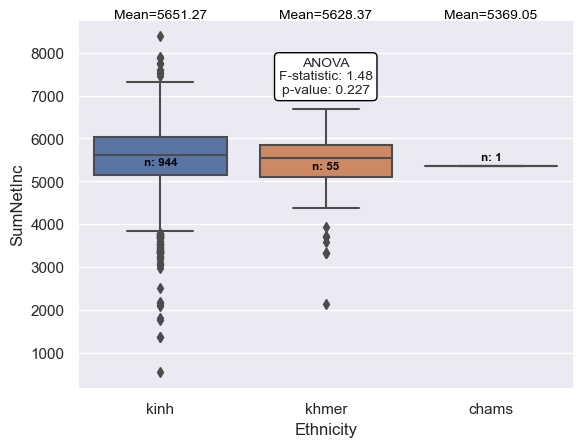

In [44]:
ax = sns.boxplot(x='Ethnicity', y='SumNetInc', data=df)

df = df.drop_duplicates(subset='Index', keep="last")

# Calculate number of observations per group & median to position labels
medians = df.groupby(['Ethnicity'])['SumNetInc'].mean().values
nobs = df['Ethnicity'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

# Position the text in the middle
pos = range(len(nobs))
for tick, label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick],
            nobs[tick],
            ha='center',
            size='x-small',
            color='black',
            weight='semibold')

# ANOVA
anova_result = f_oneway(df['SumNetInc'][df['Ethnicity'] == 'kinh'],
                        df['SumNetInc'][df['Ethnicity'] == 'khmer'],
                        df['SumNetInc'][df['Ethnicity'] == 'chams'])

# Extract F-statistic and p-value
F_statistic = anova_result.statistic
p_value = anova_result.pvalue

# Add ANOVA result to the plot
ax.annotate(f'ANOVA\nF-statistic: {F_statistic:.2f}\np-value: {p_value:.3f}',
            xy=(0.5, 0.80),
            xycoords='axes fraction',
            ha='center',
            fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1))

means = sub_df.groupby('Ethnicity')['SumNetInc'].mean().sort_index()
mean_text = [f'Mean={means.get(group, 0):.2f}' for group in ['kinh', 'khmer', 'chams']]

for i, text in enumerate(mean_text):
    ax.text(i, sub_df['SumNetInc'].max() + (sub_df['SumNetInc'].max() * 0.05), text, ha='center', color='black', fontsize=10)


plt.show()

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [84]:
# Perform Type II ANOVA
model = ols('Yield ~ Train_Group', data=df).fit()
anova_result = anova_lm(model, typ=2)

# Print ANOVA table
print(anova_result)


                  sum_sq      df         F    PR(>F)
Train_Group    18.853488     2.0  4.670407  0.009439
Residual     5835.191405  2891.0       NaN       NaN


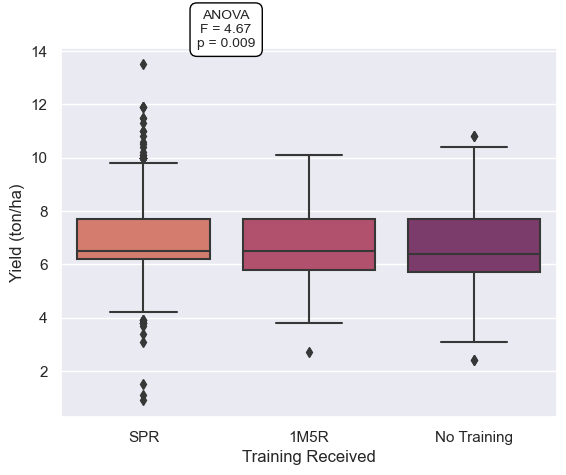

In [85]:
# Single boxplot with ANOVA results
sns.boxplot(x=df['Train_Group'], y=df['Yield'], palette='flare')
plt.xlabel("Training Received")
plt.ylabel("Yield (ton/ha)")

# Extract F-statistic and p-value from ANOVA result
F_statistic = anova_result['F'][0]
p_value = anova_result['PR(>F)'][0]

# Add ANOVA result to the plot
plt.text(0.5, df['Yield'].max() + (df['Yield'].max() * 0.05), f'ANOVA\nF = {F_statistic:.2f}\np = {p_value:.3f}', 
         ha='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()
